### Eye movement Preprocessing

The aim of the prprocessing it to exclude those data that have signifincat missing data. Several apporoches has been proposed wheather to include a sample data in the study or not. On apporach proposed by [Crabb et al. (2014)](https://www.frontiersin.org/articles/10.3389/fnagi.2014.00312/full) uses a sliding window to count the number of saccades made per second. The percentage of 1-second regions containing one or more saccades was delineated per video clip per person. Eyemovements that do not contain a saccade in more than a quarter (25%) of the 1-second regions of each clip were excluded. One also could conside plotting histogram of saccades and/or fixations to see the distrubution of the data, smaller saccade count may imply signifincat data loss.

In [8]:
import numpy as np
from scipy import interp, stats, integrate
from sklearn import svm, datasets,metrics
import pandas as pd
import pickle,sys,glob,os
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from numpy import random
import random
np.random.seed(5); random.seed(5)

from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import Image


In [204]:
# difference between successive saccades
def Count_missing_Saccdes(dataframe):
    """
    A function to count how many of the seconds in trial has no saccades
    """
    df_Saccades['SaccadeStartTime'] = df_Saccades['Start Time'].astype(np.float)
    Difference_bn_saccades = df_Saccades['SaccadeStartTime'].diff()/1000.0
    Difference_bn_saccades[1:]

    counts = Difference_bn_saccades[Difference_bn_saccades>1].count()
    maximum_diff = np.max(Difference_bn_saccades[1:])
    return(counts,maximum_diff)

In [205]:
path = '../All_data' # path to th csv files
sub_foldres = os.listdir(path)
videos  = ['DadsArmy','HistoryBoys','SkiCross']
videos  = ['DadsArmy']

for folder in sub_foldres:
    print(f'*********************************************')
    print(f'********** processing {folder} data *******')
    print(f'*********************************************')
    csvs = glob.glob(os.path.join(path,folder) + '/*.csv')
    for csv in csvs:
        df = pd.read_csv(csv,index_col = None, header = 0)
        
        for video in videos:         
            df_trial = df[df["Trial Name"] == video]
            df_Saccades = df_trial[df_trial.Fixation == 'Saccade'].reset_index(drop = True)
            SeccondsMissed, max_sec = Count_missing_Saccdes(df_Saccades)
            print(f'{csv[-8:]} in {video}, {len(df_Saccades)} saccades, {SeccondsMissed} missing seconds, max lost second for {max_sec}')
        print ()

*********************************************
********** processing Control data *******
*********************************************
C001.csv in DadsArmy, 915 saccades, 19 missing seconds, max lost second for 3.429

C002.csv in DadsArmy, 708 saccades, 48 missing seconds, max lost second for 5.972

C003.csv in DadsArmy, 388 saccades, 36 missing seconds, max lost second for 48.804

C004.csv in DadsArmy, 899 saccades, 8 missing seconds, max lost second for 1.31

C005.csv in DadsArmy, 670 saccades, 36 missing seconds, max lost second for 7.417

C006.csv in DadsArmy, 788 saccades, 35 missing seconds, max lost second for 2.393

C007.csv in DadsArmy, 610 saccades, 52 missing seconds, max lost second for 2.307

C008.csv in DadsArmy, 706 saccades, 24 missing seconds, max lost second for 2.152

C009.csv in DadsArmy, 640 saccades, 51 missing seconds, max lost second for 2.642

C010.csv in DadsArmy, 592 saccades, 56 missing seconds, max lost second for 2.942

C011.csv in DadsArmy, 890 saccades, 

32


<Figure size 3800x1200 with 0 Axes>

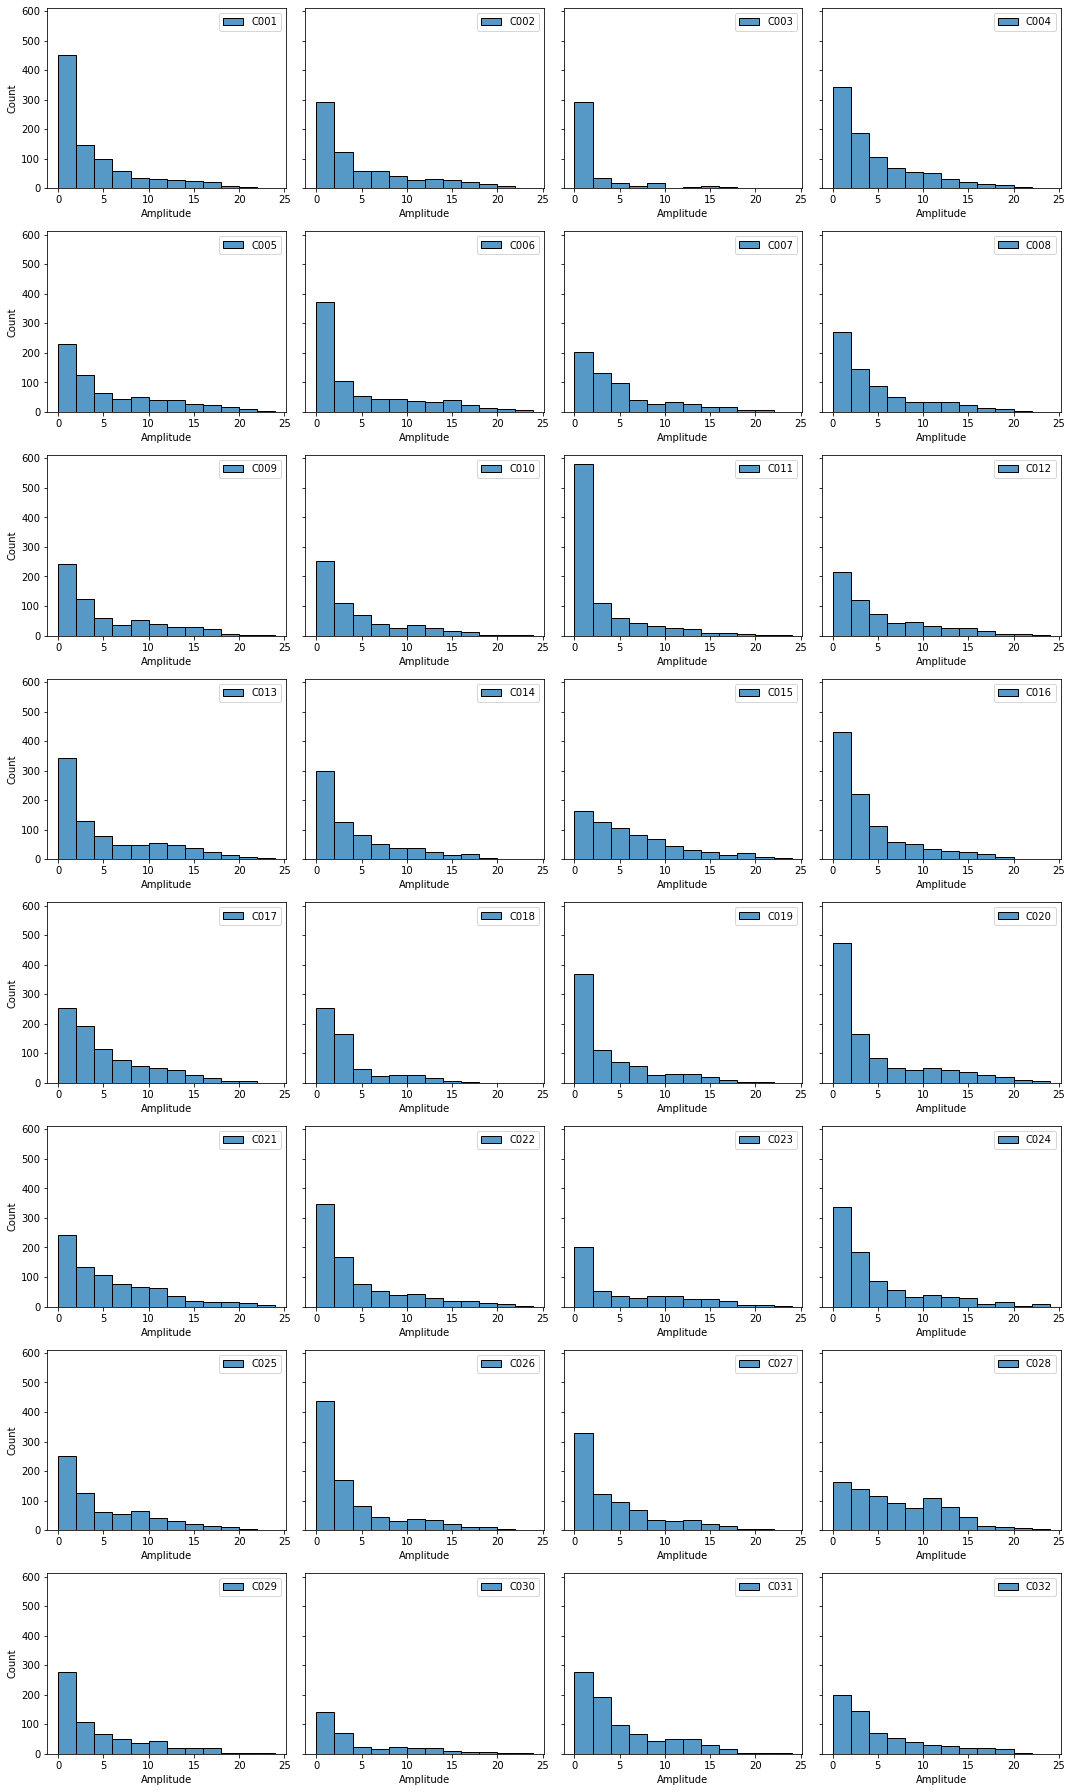

In [197]:
# Plot the distrbution of saccades for each 
path = '../All_data'
sub_foldres = os.listdir(path)
#videos  = ['DadsArmy','HistoryBoys','SkiCross']
videos  = ['DadsArmy']

csvs = glob.glob(os.path.join(path,sub_foldres[0]) + '/*.csv')
print(len(csvs))
fig, axes = plt.subplots(len(csvs)//4, 4, figsize=(15, 25), sharey=True)

ii =0
for csv in csvs:
    df = pd.read_csv(csv, skiprows = 1)
    
    for video in videos:         
        df_trial = df[df["Trial Name"] == video]
        df_Saccades = df_trial[df_trial.Saccade == 'Saccade'].reset_index(drop = True)
        sns.histplot(df_Saccades['Amplitude'], bins = list(range(0,25,2)),label= csv[-8:-4], ax = axes[ii//4][ii%4])
        
        axes[ii//4][ii%4].legend()

        ii += 1
fig.tight_layout()


Following a similar procedure in Crabb et al. (2014) a sliding window was used to count the number of saccades made per second. The percentage of 1-second regions
containing one or more saccades was delineated per video clip per person. Eye movements that do not contain a saccade in more than a quarter (25%) of the 1-
second regions of each clip were excluded. The figures below shows the trials that are excluded are highlited in red.
$VIDEO A$ is Dads Army, $VIDEO B$ tory Boys and $VIDEO C$ is SkiCross.


<img src = "Controls-1.jpg" style="width:1400px;height:1000px;"/>
<img src = "Patients.jpg" style="width:1400px;height:1000px;"/>

